<a href="https://colab.research.google.com/github/JzesatiD/british_airlines_dataproj/blob/main/BA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Task 2: Predictive modeling of customer bookings</center>

---

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [9]:
import pandas as pd ## for working with dataframes
import matplotlib.pyplot as plt # for plotting
import seaborn as sns           # also for plotting
sns.set(style='whitegrid')

In [10]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [12]:
df.isnull().sum()

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


## The dataframe has no null values

In [13]:
## Let's do some transformations
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [14]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [15]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [16]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

EDA PHASE: Visualizations and Metrics

Text(0, 0.5, 'Count')

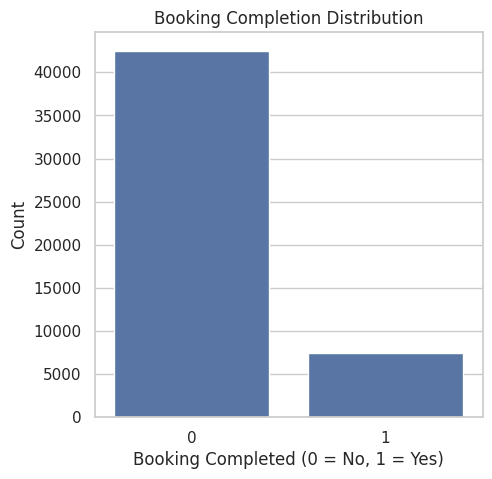

In [39]:
# Plot a bar chart of our TARGET VARIABLE "booking_complete"
plt.figure(figsize=(5,5))
sns.countplot(x='booking_complete', data = df)
plt.title("Booking Completion Distribution")
plt.xlabel("Booking Completed (0 = No, 1 = Yes)")
plt.ylabel("Count")

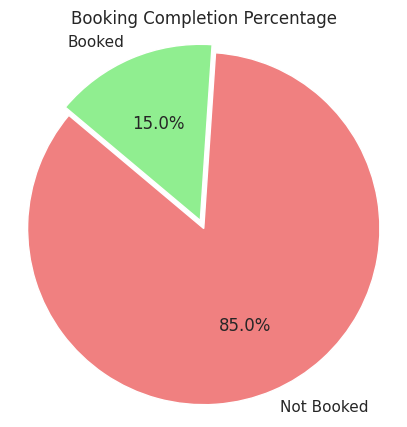

In [36]:
# Calculate the proportions
booking_counts = df['booking_complete'].value_counts()
labels = ['Not Booked', 'Booked']
sizes = booking_counts.values
colors = ['lightcoral', 'lightgreen']

# Plot the pie chart
plt.figure(figsize=(5,))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors,
        explode=(0, 0.05))
plt.title("Booking Completion Percentage")
plt.axis('equal')  # Ensures the pie is a circle
plt.show()

Here it is very clear that an unfavorable imbalance is present in our data. The next step to explore which variables are contributing to this most.

## Numerical Analysis
**Objective:**
- Understand distribution (skewness, outliers)

- Identify patterns that correlate with bookings

- Generate histograms and booking rate line/bar plots for context

**Numerical Features**:
- num_passengers = number of passengers travelling

- purchase_lead = number of days between travel date and booking date

- length_of_stay = number of days spent at destination

- flight_hour = hour of flight departure

- flight_day

- flight_duration = total duration of flight (in hours)

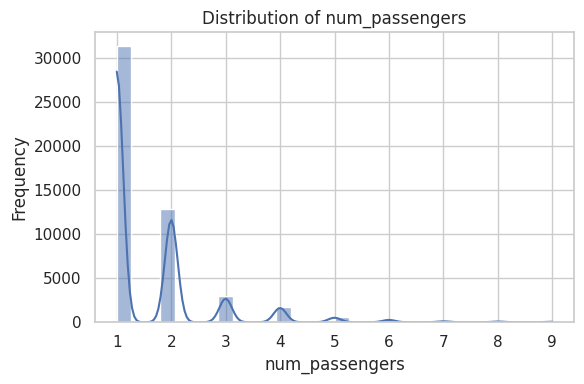

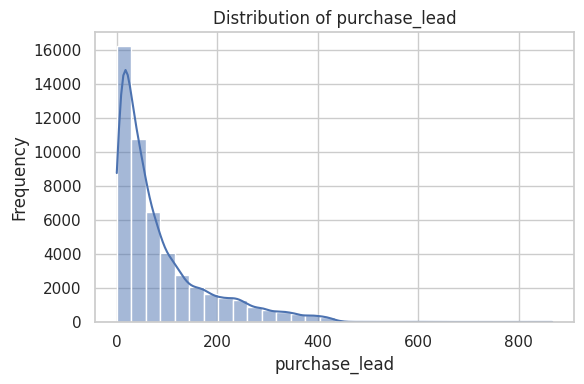

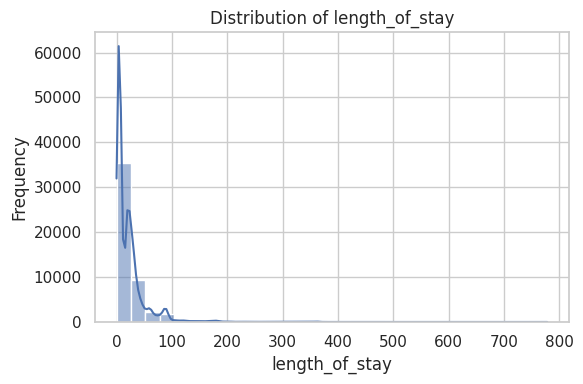

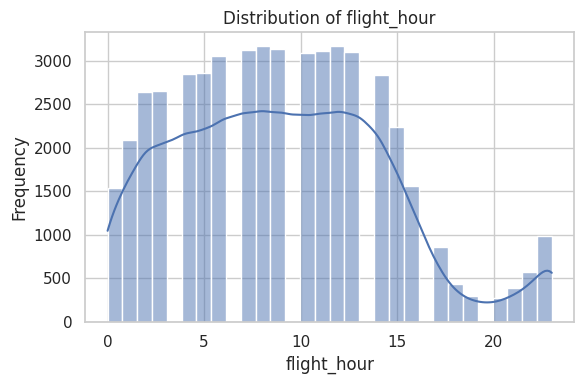

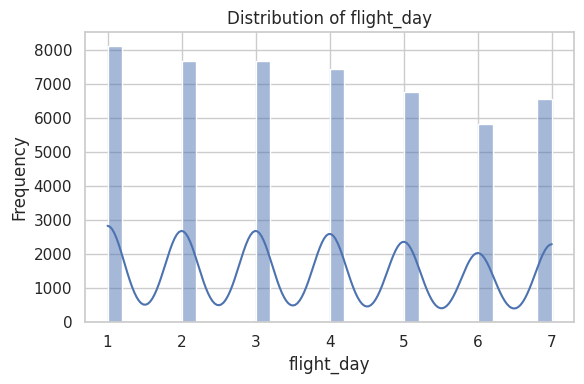

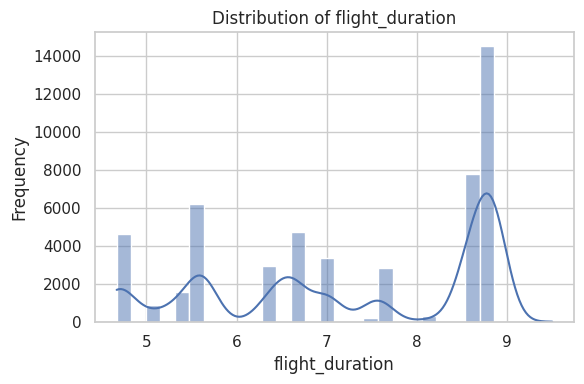

In [20]:

numeric_vars = ['num_passengers', 'purchase_lead', 'length_of_stay',
                'flight_hour', 'flight_day', 'flight_duration']

for var in numeric_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

num_passengers ==> heavily right skewed. Most cases have very low number of passengers

purchase_lead ==> also heavily right-skewed, however the range is approximately from 0 and up to 400 days between booked date and departure.

length_of_stay ==> Heavily right-skewed. Most stays are within approximately 20 days. Very rare for more than 100 days

flight_hour = Most departures take place around 7-15 or 7AM-3PM very a drastic decrease after 3PM, lasting all evening.

flight_day ==> No pattern here
 - MAX: Day 1 (Monday)
 - MIN: Day 6 (Saturday)

flight_duration ==> No Discernable pattern but the behavior shows that most flights last approx. 9 hours

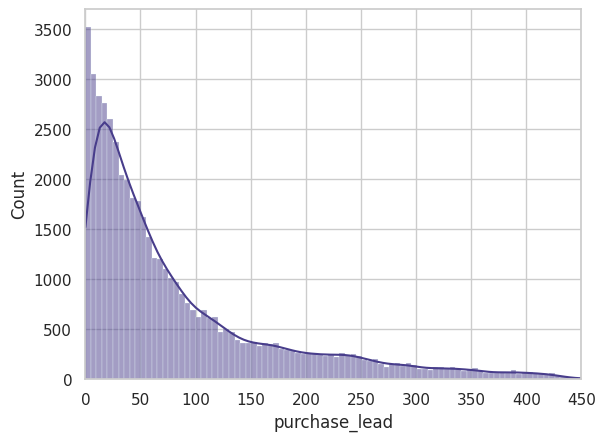

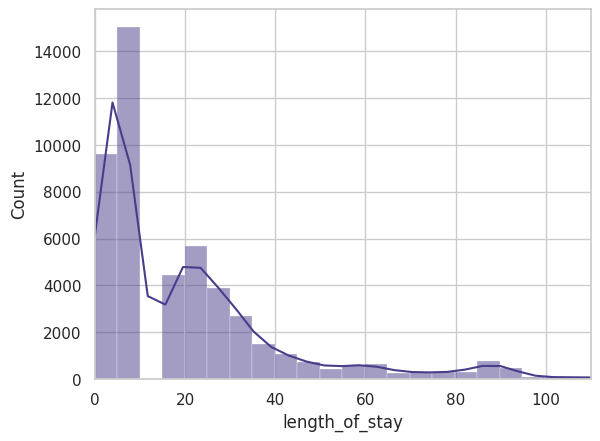

In [21]:
## Adjusted ranage for Purchase Lead
sns.histplot(data = df, x = 'purchase_lead', color = 'darkslateblue',
edgecolor='azure', binwidth=5, kde=True)
plt.xlim(0, 450)
plt.show()

## Adjusted ranage for Length of Stay
sns.histplot(data = df, x = 'length_of_stay', color = 'darkslateblue',
edgecolor='azure', binwidth=5, kde=True)
plt.xlim(0, 110)
plt.show()

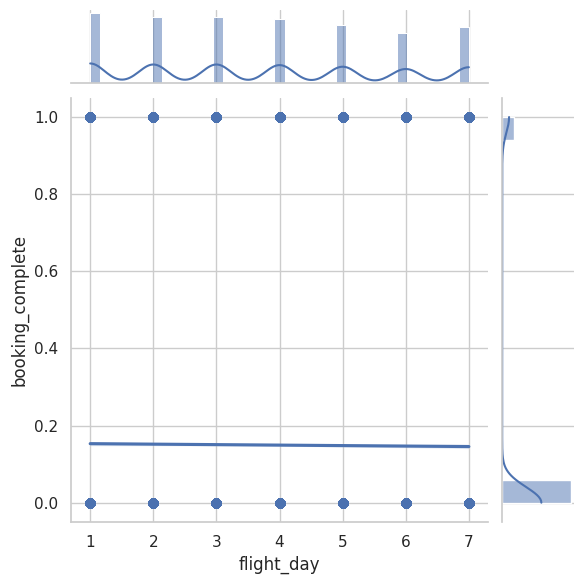

In [22]:
sns.jointplot(data=df, x='flight_day', y='booking_complete', kind='reg')
plt.show()

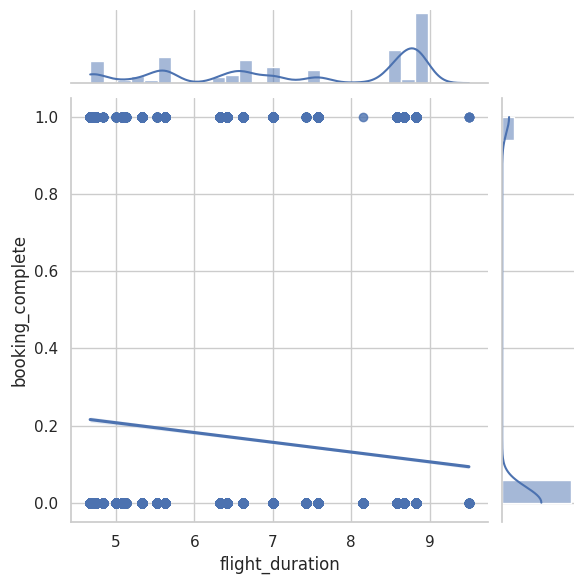

In [23]:
sns.jointplot(data=df, x='flight_duration', y='booking_complete', kind='reg')
plt.show()

Based on the different linear plots for flight day vs flight duration per completed bookings, we can determine there is no linear relation between day of flight and completed booking (yes/no).

## Categorical Analysis

**Objective**:
Understand how segment behavior impacts bookings

Use bar charts to show conversion rate by category

**Categorical Columns**:

sales_channel  = sales channel booking was made on

trip_type = trip Type (Round Trip, One Way, Circle Trip)

flight_day (already numeric, but treat as categorical)

booking_origin =  country from where booking was made

route (top 10 only) = origin -> destination flight route

Step 1: Group by the categorical variable
python
Copy
Edit
df.groupby(col)['booking_complete']
You’re splitting the dataset into groups by each unique category value — for example:

sales_channel = Web

sales_channel = Mobile

etc.

Step 2: Calculate the mean of the booking_complete column
python
Copy
Edit
.groupby(col)['booking_complete'].mean()
Since booking_complete is a 0/1 column:

The mean of this column is the proportion of bookings (1s) in each category
e.g., if 100 customers came via "Web" and 12 booked → mean = 0.12

Step 3: Sort the results
python
Copy
Edit
.sort_values(ascending=False)
To rank from highest to lowest conversion rate.

Step 4: Plot with a bar chart
python
Copy
Edit
sns.barplot(x=col, y='booking_complete', data=...)
This visually communicates:

Which categories perform best

Which are lagging behind

In [32]:
categorical_cols = ['sales_channel', 'trip_type', 'booking_origin']

for col in categorical_cols:
  print(df[col].value_counts())

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64
trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64
booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Ghana                       1
Gibraltar                   1
Guatemala                   1
Algeria                     1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64


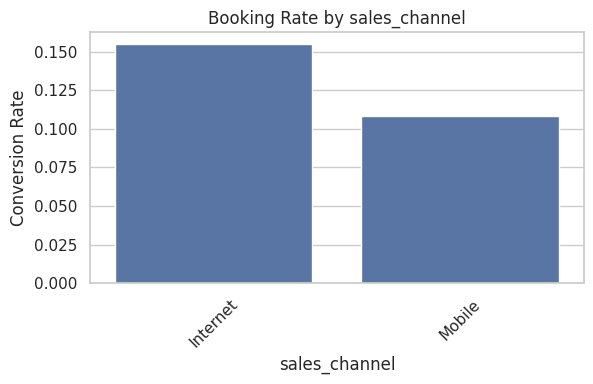

  sales_channel  booking_complete
0      Internet          0.154770
1        Mobile          0.108402


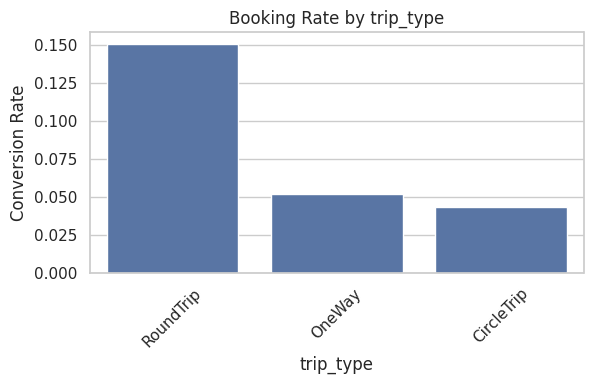

    trip_type  booking_complete
0   RoundTrip          0.150575
1      OneWay          0.051680
2  CircleTrip          0.043103


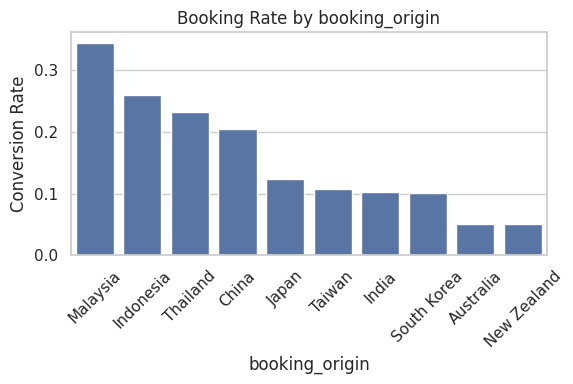

  booking_origin  booking_complete
0       Malaysia          0.344020
1      Indonesia          0.259603
2       Thailand          0.231527
3          China          0.204901
4          Japan          0.123037
5         Taiwan          0.107848
6          India          0.103150
7    South Korea          0.101338
8      Australia          0.050358
9    New Zealand          0.050279


In [24]:
# 'route' can be handled separately

for col in categorical_cols:
    # Limit high-cardinality features like booking_origin to top 10
    if df[col].nunique() > 10:
        top_vals = df[col].value_counts().nlargest(10).index
        df_subset = df[df[col].isin(top_vals)]
    else:
        df_subset = df.copy()

    # Compute booking rate per category
    rate = df_subset.groupby(col)['booking_complete'].mean().sort_values(ascending=False).reset_index()

    # Plot
    plt.figure(figsize=(6, 4))
    sns.barplot(x=col, y='booking_complete', data=rate)
    plt.title(f'Booking Rate by {col}')
    plt.ylabel('Conversion Rate')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print(rate)


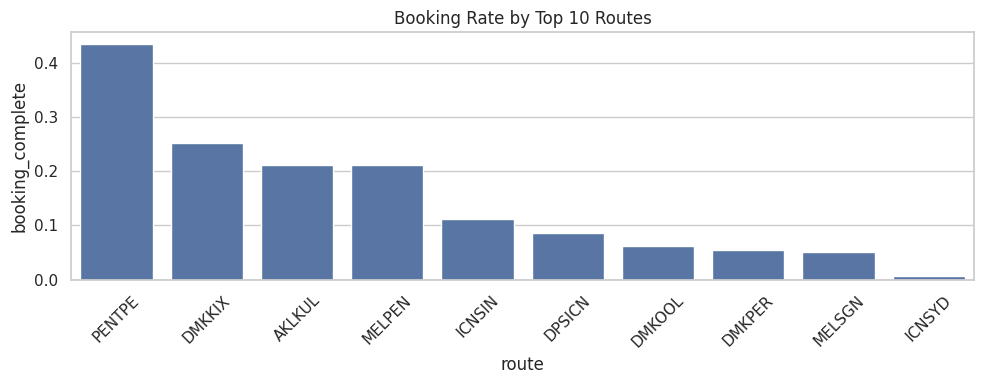

    route  booking_complete
0  PENTPE          0.433983
1  DMKKIX          0.251344
2  AKLKUL          0.211567
3  MELPEN          0.211094
4  ICNSIN          0.112360
5  DPSICN          0.085586
6  DMKOOL          0.061069
7  DMKPER          0.054492
8  MELSGN          0.051069
9  ICNSYD          0.007194


In [30]:
top_routes = df['route'].value_counts().nlargest(10).index
df_subset = df[df['route'].isin(top_routes)]

rate = df_subset.groupby('route')['booking_complete'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(x='route', y='booking_complete', data=rate)
plt.title('Booking Rate by Top 10 Routes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(rate)

Booking behavior varies sharply by channel, trip type, and geography.
RoundTrips and bookings from Southeast Asia convert at up to 6x the global average.
These group-level insights informed categorical feature design for the model

In [35]:
# Group route and origin
top_routes = df['route'].value_counts().nlargest(10).index
df['route'] = df['route'].where(df['route'].isin(top_routes), 'Other')

top_origins = df['booking_origin'].value_counts().nlargest(10).index
df['booking_origin'] = df['booking_origin'].where(df['booking_origin'].isin(top_origins), 'Other')

# One-hot encode everything categorical
df_encoded = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'route',
                                         'booking_origin'], drop_first=True)
df_encoded.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,route_PENTPE,booking_origin_China,booking_origin_India,booking_origin_Indonesia,booking_origin_Japan,booking_origin_Malaysia,booking_origin_Other,booking_origin_South Korea,booking_origin_Taiwan,booking_origin_Thailand
0,2,262,19,7,6,1,0,0,5.52,0,...,False,False,False,False,False,False,True,False,False,False
1,1,112,20,3,6,0,0,0,5.52,0,...,False,False,False,False,False,False,True,False,False,False
2,2,243,22,17,3,1,1,0,5.52,0,...,False,False,True,False,False,False,False,False,False,False
3,1,96,31,4,6,0,0,1,5.52,0,...,False,False,False,False,False,False,True,False,False,False
4,2,68,22,15,3,1,0,1,5.52,0,...,False,False,True,False,False,False,False,False,False,False


In [40]:
'''# Regression Analysis on Variables
!pip install statsmodels
import statsmodels.api as sm'''

'# Regression Analysis on Variables\n!pip install statsmodels\nimport statsmodels.api as sm'

In [41]:
'''X = df[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']]
y = df['booking_complete']'''

"X = df[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']]\ny = df['booking_complete']"

In [42]:
'''X = sm.add_constant(X)'''

'X = sm.add_constant(X)'

In [43]:
'''logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())'''

'logit_model = sm.Logit(y, X)\nresult = logit_model.fit()\nprint(result.summary())'

We can determine that the flight_hour variable does not impact the target variable significantly, unlike the counterparts.